<a href="https://colab.research.google.com/github/lfluchi/ring_detection/blob/master/CNN_anel_over_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import os, shutil, random, glob
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
from keras import backend as K
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

In [2]:
#paths to load datasets
hdf5_train = '/content/drive/My Drive/Trabalho conclusão Lucas/Imagens/hdf5/12134_train_164_215_3.h5'
hdf5_valid = '/content/drive/My Drive/Trabalho conclusão Lucas/Imagens/hdf5/2058_valid_164_215_3.h5'

In [3]:
#trainning data shape
with h5py.File(hdf5_train, "r") as f:
        
    train_imgs = f["images"][:]
    train_labels = f["meta"][:]

    print('train_imgs shape =', train_imgs.shape, '| train_labels shape =', train_labels.shape)

train_imgs shape = (12134, 164, 215, 3) | train_labels shape = (12134,)


In [4]:
#validation data shape
with h5py.File(hdf5_valid, "r") as f:
    
    valid_imgs = f["images"][:]
    valid_labels = f["meta"][:]

    print('valid_imgs shape =', valid_imgs.shape, '| valid_labels shape =', valid_labels.shape)

valid_imgs shape = (2058, 164, 215, 3) | valid_labels shape = (2058,)


In [5]:
#label of a img
index = 0
image = train_imgs[index]
print(image.shape)
#plt.imshow(image)
print('label =', train_labels[index])

(164, 215, 3)
label = 1


In [7]:
#reescale images
train_imgs_scaled = train_imgs.astype('float32')
valid_imgs_scaled  = valid_imgs.astype('float32')
train_imgs_scaled /= 255
valid_imgs_scaled /= 255

In [ ]:
#visualize
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [9]:
#visualize some labels
print(train_labels[1495:1505])

[1 1 1 1 1 1 1 1 1 1]


In [10]:
#set up some basic configuration parameters
batch_size = 36
num_classes = 2
epochs = 8
input_shape = (164, 215, 3)

In [11]:
#create model
model = models.Sequential()

In [12]:
#model architecture
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=input_shape))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
#model.add(layers.Conv2D(128, (3,3), activation='relu'))
#model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
#model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 162, 213, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 211, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 105, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 78, 103, 64)       18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 76, 101, 64)       36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 50, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 36, 48, 64)        3

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),#SGD(lr=0.01, clipvalue=0.5),
              metrics=['acc'])

In [15]:
#train
history = model.fit(x=train_imgs_scaled, y=train_labels,
                    validation_data=(valid_imgs_scaled, valid_labels),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/8
338/338 [==============================] - 33s 98ms/step - loss: 0.6766 - acc: 0.6347 - val_loss: 0.0682 - val_acc: 0.9791
Epoch 2/8
338/338 [==============================] - 34s 100ms/step - loss: 0.3164 - acc: 0.9588 - val_loss: 0.0027 - val_acc: 0.9995
Epoch 3/8
338/338 [==============================] - 33s 97ms/step - loss: 0.0568 - acc: 0.9871 - val_loss: 4.2749e-06 - val_acc: 1.0000
Epoch 4/8
338/338 [==============================] - 33s 97ms/step - loss: 0.0611 - acc: 0.9932 - val_loss: 0.0074 - val_acc: 0.9985
Epoch 5/8
338/338 [==============================] - 33s 97ms/step - loss: 0.0266 - acc: 0.9959 - val_loss: 0.0275 - val_acc: 0.9995
Epoch 6/8
338/338 [==============================] - 33s 97ms/step - loss: 0.0278 - acc: 0.9986 - val_loss: 1.4234e-04 - val_acc: 1.0000
Epoch 7/8
338/338 [==============================] - 33s 97ms/step - loss: 0.0253 - acc: 0.9988 - val_loss: 0.0081 - val_acc: 0.9995
Epoch 8/8
338/338 [==============================] - 33s 97m

In [16]:
model.save('/content/drive/My Drive/Trabalho conclusão Lucas/modelos/anel_reten_over_2.h5')

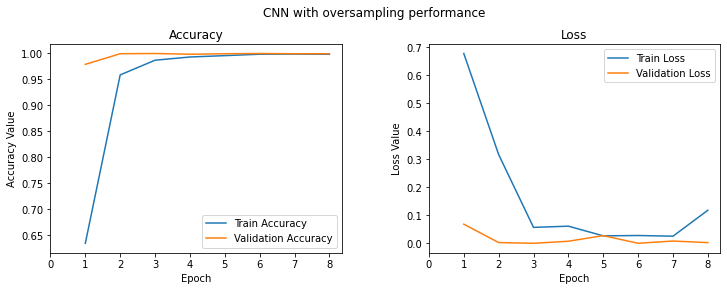

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN with oversampling performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,9))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 9, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 9, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [10]:
scores = model.evaluate(valid_imgs_scaled, valid_labels, batch_size = 147) #4042 testing images
print("Loss, Accuracy:", scores)

14/14 [==============================] - 1s 95ms/step - loss: 0.0025 - acc: 0.9995
Loss, Accuracy: [0.0025098794139921665, 0.999514102935791]


Confusion matrix, without normalization
[[6068    0]
 [6066    0]]
              precision    recall  f1-score   support

        boaz       0.50      1.00      0.67      6068
       ruinz       0.00      0.00      0.00      6066

    accuracy                           0.50     12134
   macro avg       0.25      0.50      0.33     12134
weighted avg       0.25      0.50      0.33     12134



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


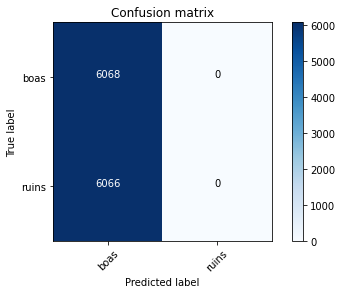

In [17]:
#train confusion matrix
batch_size = 36
num_of_test_samples = 12134
predictions = model.predict(train_imgs_scaled, batch_size=batch_size)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = train_labels
class_labels = ('boaz', 'ruinz')

cm = confusion_matrix (true_classes, predicted_classes)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  thresh = cm.max() / 2.
  for i, j, in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

cm_plot_labels = ['boas', 'ruins']
plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion matrix')

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

Confusion matrix, without normalization
[[2022    0]
 [  36    0]]
              precision    recall  f1-score   support

        boas       0.98      1.00      0.99      2022
       ruins       0.00      0.00      0.00        36

    accuracy                           0.98      2058
   macro avg       0.49      0.50      0.50      2058
weighted avg       0.97      0.98      0.97      2058



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


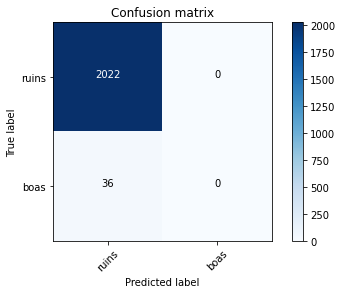

In [18]:
#matriz de confusão da validação
batch_size = 147
num_of_test_samples = 2058
predictions = model.predict(valid_imgs_scaled,  batch_size=batch_size)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = valid_labels
class_labels = ('boas', 'ruins')

cm = confusion_matrix (true_classes, predicted_classes)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  thresh = cm.max() / 2.
  for i, j, in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

cm_plot_labels = ['ruins', 'boas']
plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion matrix')

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

Test

In [8]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/Trabalho conclusão Lucas/modelos/anel_reten_over_2.h5')

In [ ]:
test_files = glob.glob('/content/drive/My Drive/Trabalho conclusão Lucas/Imagens/test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[7].split('_')[0].strip() for fn in test_files] #conforme anteriormente cfe tamanho do caminho

print('Test dataset shape:', test_imgs.shape)

In [ ]:
#reescale images / encode labels
test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255

test_labels_enc = class2num_label_transformer(test_labels)

print(test_labels[0:5], test_labels_enc[0:5])

In [ ]:
predictions = model.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)

meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))